# This notebook contains Iris Dataset project to diffrentiate between 3 varieties of flowers.

Attribute Information:

1. sepal length in cm 
2. sepal width in cm 
3. petal length in cm 
4. petal width in cm 
5. class: 
-- Iris Setosa 
-- Iris Versicolour 
-- Iris Virginica



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df = pd.read_csv('Iris.csv')

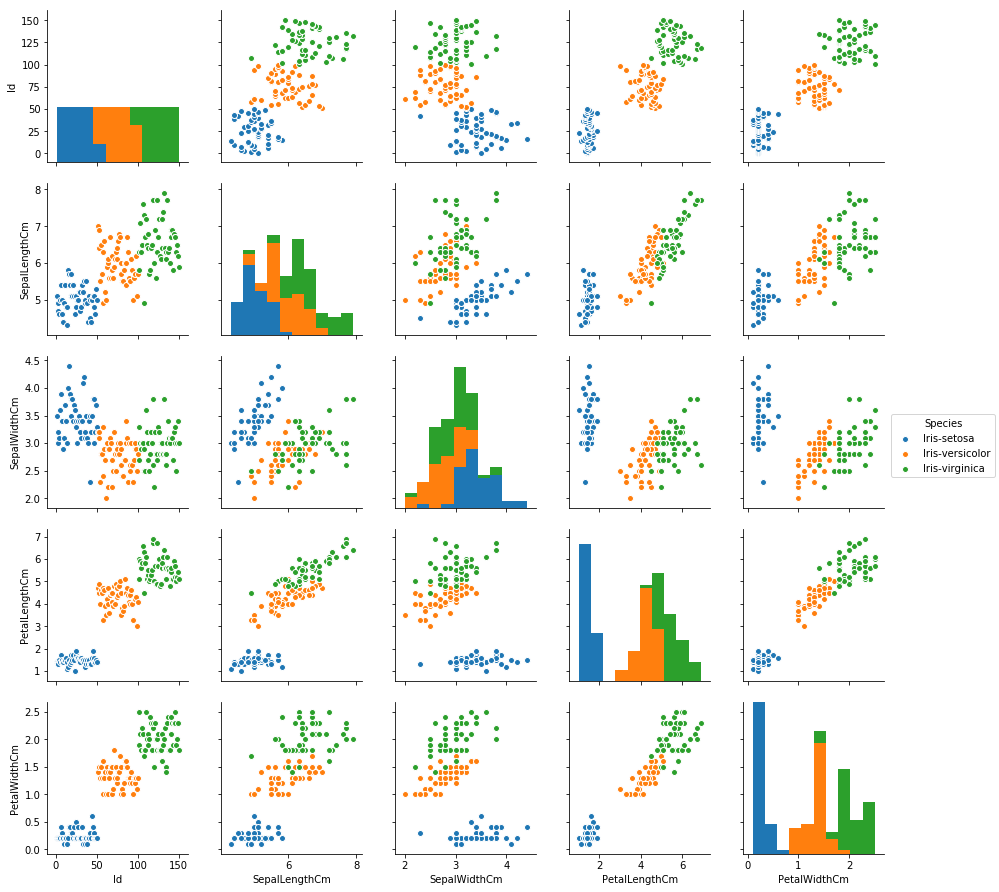

In [6]:
import seaborn as sns
sns.pairplot(df,hue ='Species')

In [8]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [10]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [11]:
X =df.drop('Species',axis = 1)

In [13]:
X.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [14]:
target_names = df['Species'].unique()
target_names

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [15]:
# converting Species text values to numerical values

target_dict = {n:i for i , n in enumerate(target_names)}
target_dict

# each flower type is now expressed using numbers 0 or 1 or 2

{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

In [16]:
y =df['Species'].map(target_dict)
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

In [17]:
# Creating dummy columns

from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [18]:
y_cat = to_categorical(y)

In [21]:
y_cat[:10]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [22]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y_cat,test_size=0.2,random_state=101)

In [53]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam # SGD is stochastic gradient decent(Optimizers)

In [54]:
model = Sequential()
model.add(Dense(3,input_shape=(5,),activation ='softmax'))
model.compile(Adam(lr=0.1),loss = 'categorical_crossentropy', metrics=['accuracy'])

In [55]:
model.fit(X_train,y_train, epochs=40,validation_split=0.1)

#validation_split=0.1 takes only the 10% of training data to perform calculation of accuracy

Train on 108 samples, validate on 12 samples
Epoch 1/40
108/108 [==============================] - 0s 2ms/step - loss: 7.9566 - acc: 0.3241 - val_loss: 4.0982 - val_acc: 0.7500
Epoch 2/40
108/108 [==============================] - 0s 74us/step - loss: 6.4786 - acc: 0.4722 - val_loss: 4.4395 - val_acc: 0.6667
Epoch 3/40
108/108 [==============================] - 0s 111us/step - loss: 6.2487 - acc: 0.4907 - val_loss: 4.3707 - val_acc: 0.5000
Epoch 4/40
108/108 [==============================] - 0s 74us/step - loss: 5.9981 - acc: 0.5556 - val_loss: 4.0386 - val_acc: 0.7500
Epoch 5/40
108/108 [==============================] - 0s 129us/step - loss: 5.8539 - acc: 0.6296 - val_loss: 4.0569 - val_acc: 0.7500
Epoch 6/40
108/108 [==============================] - 0s 65us/step - loss: 5.8865 - acc: 0.6111 - val_loss: 4.0368 - val_acc: 0.7500
Epoch 7/40
108/108 [==============================] - 0s 83us/step - loss: 5.8450 - acc: 0.6389 - val_loss: 4.0449 - val_acc: 0.7500
Epoch 8/40
108/108 [===

In [34]:
y_pred= model.predict(X_test)

In [36]:
y_pred[:5]

array([[9.9470842e-01, 5.2916221e-03, 3.2693638e-08],
       [9.9791998e-01, 2.0800720e-03, 2.1295379e-09],
       [8.5929745e-01, 1.4066911e-01, 3.3350956e-05],
       [2.2852602e-07, 1.8388275e-02, 9.8161143e-01],
       [2.1042822e-01, 7.8936666e-01, 2.0512272e-04]], dtype=float32)

In [37]:
y_test_class =np.argmax(y_test , axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

# for each row find the maximum value 

In [61]:
from sklearn.metrics import classification_report,confusion_matrix

In [62]:
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        10
          1       1.00      0.67      0.80        12
          2       0.67      1.00      0.80         8

avg / total       0.91      0.87      0.87        30

[[10  0  0]
 [ 0  8  4]
 [ 0  0  8]]
